In [1]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua."

In [4]:
def count_words(text):
    """
    Count number of words.
    """
    text = text.lower()
    skips = ['.',',',':',';','"',"'"]
    for ch in skips:
        text = text.replace(ch,'')
        
    word_counts = {}
    
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

In [10]:
from collections import Counter

def count_words_fast(text):
    """
    Count number of words using collections.Counter.
    """
    text = text.lower()
    skips = ['.',',',':',';','"',"'"]
    for ch in skips:
        text = text.replace(ch,'')
        
    word_counts = Counter(text.split(' '))

    return word_counts

In [9]:
count_words_fast(text) is count_words(text)

False

In [11]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, 'r', encoding='UTF-8') as current_file:
        text = current_file.read()
        text = text.replace('\n','').replace('\r','')
    return text

In [21]:
text = read_book('D:\\Projekty\\edx\\Case_studies\\Language processing\\romeo_and_juliet.txt')

In [27]:
def word_stats(word_counts):
    num_uni = len(word_counts)
    counts = word_counts.values()
    return (num_uni, counts)
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [54]:
import os
book_dir = "D:\\Projekty\\edx\\Case_studies\\Language processing"
type(os.listdir(book_dir))

list

In [52]:
import pandas as pd

stats = pd.DataFrame(columns = ('name', 'length', 'unique'))
title_num = 1

for book in os.listdir(book_dir + '\\Books'):
    if book.startswith('.'):
        continue
    inputfile = book_dir + '\\Books\\' + book
    print(inputfile)
    text = read_book(inputfile)
    (num_unique, counts) = word_stats(count_words(text))
    stats.loc[title_num] = book.capitalize().replace('.txt',''), sum(counts), num_unique
    title_num += 1

D:\Projekty\edx\Case_studies\Language processing\Books\romeo_and_julia_ger.txt
D:\Projekty\edx\Case_studies\Language processing\Books\romeo_and_juliet.txt


In [53]:
stats

,name,length,unique
1,Romeo_and_julia_ger,20311,7523
2,Romeo_and_juliet,40811,5129


In [69]:
stats['unique']

1    7523
2    5129
Name: unique, dtype: object

In [56]:
import matplotlib.pyplot as plt

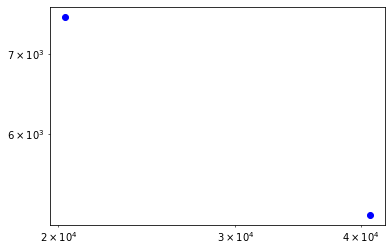

In [65]:
plt.loglog(stats.length, stats.unique, 'bo')

In [59]:
stats[stats.length==20311]

,name,length,unique
1,Romeo_and_julia_ger,20311,7523


In [60]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

No handles with labels found to put in legend.


Text(0.5, 0, 'Number')

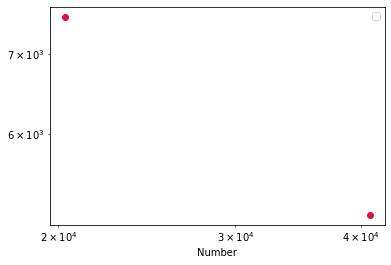

In [66]:
plt.loglog(stats.length, stats.unique, 'o', color = 'crimson')
plt.legend()
plt.xlabel('Number')